In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy

### Import LDA document vectors

In [5]:
wv_matrix = np.load('../../processed_files/w2v_matrix.npy')
df_merged = pickle.load(open("../../processed_files/df_merged.pickle", "rb"))

In [6]:
wv_matrix.shape

(12968, 300)

In [7]:
df_merged.head()

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED
0,0-my.com,0-my.com related searches: related searches:,"[mycom, related, searches, related, searches]","[0, -, m, y, ., c, o, m, , r, e, l, a, t, e, ..."
1,00bitz.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ..."
2,01187.com,01187.com is available for purchase! - wwwv1.c...,"[com, vailable, purchase, wwwvcom, welcome, uu...","[0, 1, 1, 8, 7, ., c, o, m, , i, s, , a, v, ..."
3,027.ir,"027.ir - dns4.ir 027.ir hits: 7,267 under cons...","[ir, dnsir, ir, hits, construction, coming, so...","[0, 2, 7, ., i, r, , -, , d, n, s, 4, ., i, ..."
4,03h.org,february | 2014 | online marketing review sear...,"[february, online, marketing, review, search, ...","[f, e, b, r, u, a, r, y, , |, , 2, 0, 1, 4, ..."


In [8]:
df_merged.shape

(12975, 4)

In [9]:
type(wv_matrix[0])

numpy.ndarray

In [11]:
np.average(wv_matrix[[0, 1, 2]], axis=0)

array([ 7.11640038e-02,  4.17813845e-03,  1.85536413e-02,  1.52058328e-02,
       -5.30786676e-02, -1.48066754e-03,  8.53961731e-02, -5.25787883e-02,
        9.85676957e-02,  4.85248963e-02, -3.33715094e-02, -3.56996966e-02,
       -8.83534811e-02,  8.24376298e-02, -7.64957865e-02,  7.92978331e-02,
        9.27031115e-02, -1.39814603e-02,  2.07524346e-02, -1.21112953e-01,
        2.40214417e-02, -7.02925910e-02, -8.01150873e-02,  1.88078042e-02,
       -1.36617719e-01, -2.69067151e-02, -6.26204237e-02,  8.95324027e-02,
        5.59854318e-02, -6.33896391e-02, -3.87329414e-03, -1.01551505e-01,
       -3.73637602e-02, -4.67776135e-03, -5.17133561e-03, -3.49146615e-02,
        1.49634331e-02, -3.16308488e-02,  9.38911065e-02, -9.13033945e-03,
        1.17920283e-02, -1.08974917e-02,  9.02914753e-04,  8.29488908e-03,
       -4.10694766e-02, -1.82756469e-01,  4.38553824e-02,  2.04407660e-02,
       -1.02471873e-01, -1.19346782e-02,  3.40971102e-02, -5.27033312e-02,
        3.57241742e-02, -

## DB Scan

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
# eps (default 0.5): the maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples (default 5): number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself
# algorithm (default 'auto'): ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’
dbscan = DBSCAN(eps = 0.1, min_samples = 5).fit(wv_matrix)

In [14]:
dbscan.labels_

array([ 0,  1, -1, ..., 18, -1, -1])

In [15]:
num_clusters = max(dbscan.labels_)
num_clusters

90

In [16]:
dbscan

DBSCAN(eps=0.1)

In [17]:
index_cluster = zip(range(len(dbscan.labels_)), dbscan.labels_)
index_cluster_dict = dict(index_cluster)
index_cluster_dict[456]

-1

In [18]:
cluster_index = list(zip(dbscan.labels_, range(len(dbscan.labels_))))

In [19]:
cluster_list = dict()
for i in range(num_clusters):
    cluster_list[i] = list(filter(lambda row: row[0] == i, cluster_index))

In [20]:
for i in range(num_clusters):
    print('cluster: ', i, 'size: ', len(cluster_list[i]))

cluster:  0 size:  95
cluster:  1 size:  295
cluster:  2 size:  11
cluster:  3 size:  9
cluster:  4 size:  279
cluster:  5 size:  23
cluster:  6 size:  235
cluster:  7 size:  109
cluster:  8 size:  43
cluster:  9 size:  59
cluster:  10 size:  6
cluster:  11 size:  176
cluster:  12 size:  9
cluster:  13 size:  22
cluster:  14 size:  67
cluster:  15 size:  8
cluster:  16 size:  14
cluster:  17 size:  21
cluster:  18 size:  32
cluster:  19 size:  21
cluster:  20 size:  14
cluster:  21 size:  84
cluster:  22 size:  16
cluster:  23 size:  20
cluster:  24 size:  103
cluster:  25 size:  35
cluster:  26 size:  12
cluster:  27 size:  5
cluster:  28 size:  20
cluster:  29 size:  74
cluster:  30 size:  12
cluster:  31 size:  7
cluster:  32 size:  8
cluster:  33 size:  30
cluster:  34 size:  92
cluster:  35 size:  9
cluster:  36 size:  8
cluster:  37 size:  26
cluster:  38 size:  6
cluster:  39 size:  54
cluster:  40 size:  18
cluster:  41 size:  18
cluster:  42 size:  7
cluster:  43 size:  5
clus

In [21]:
len(cluster_list[0])

95

In [22]:
len(cluster_list[1])

295

In [23]:
len(cluster_list[2])

11

In [24]:
len(cluster_list[num_clusters-1])

7

In [25]:
cluster_list[1]

[(1, 1),
 (1, 25),
 (1, 27),
 (1, 121),
 (1, 138),
 (1, 141),
 (1, 179),
 (1, 365),
 (1, 373),
 (1, 594),
 (1, 628),
 (1, 631),
 (1, 670),
 (1, 697),
 (1, 723),
 (1, 729),
 (1, 748),
 (1, 752),
 (1, 763),
 (1, 770),
 (1, 782),
 (1, 789),
 (1, 822),
 (1, 943),
 (1, 951),
 (1, 1040),
 (1, 1120),
 (1, 1427),
 (1, 1436),
 (1, 1783),
 (1, 1834),
 (1, 1850),
 (1, 1981),
 (1, 1990),
 (1, 2002),
 (1, 2006),
 (1, 2056),
 (1, 2059),
 (1, 2137),
 (1, 2184),
 (1, 2188),
 (1, 2194),
 (1, 2202),
 (1, 2337),
 (1, 2435),
 (1, 2438),
 (1, 2481),
 (1, 2502),
 (1, 2521),
 (1, 2524),
 (1, 2572),
 (1, 2573),
 (1, 2574),
 (1, 2577),
 (1, 2579),
 (1, 2585),
 (1, 2602),
 (1, 2644),
 (1, 2673),
 (1, 2767),
 (1, 2780),
 (1, 2795),
 (1, 2821),
 (1, 2822),
 (1, 2824),
 (1, 2883),
 (1, 2939),
 (1, 3024),
 (1, 3060),
 (1, 3140),
 (1, 3158),
 (1, 3222),
 (1, 3231),
 (1, 3313),
 (1, 3386),
 (1, 3425),
 (1, 3494),
 (1, 3499),
 (1, 3552),
 (1, 3590),
 (1, 3707),
 (1, 3712),
 (1, 3770),
 (1, 3893),
 (1, 3910),
 (1, 3912

In [27]:
[i[1] for i in cluster_list[0]]

[0,
 140,
 167,
 252,
 280,
 479,
 568,
 637,
 660,
 1155,
 1689,
 1958,
 1989,
 2048,
 2065,
 2070,
 2091,
 2126,
 2349,
 2409,
 3207,
 3249,
 3430,
 3640,
 3926,
 3958,
 3959,
 3964,
 3975,
 3980,
 3985,
 3996,
 4089,
 4097,
 4115,
 4170,
 4269,
 4396,
 4450,
 4732,
 4782,
 4963,
 5305,
 5440,
 5468,
 5566,
 5575,
 5864,
 6218,
 6219,
 6571,
 7111,
 7172,
 7183,
 7235,
 7388,
 7413,
 7465,
 7484,
 7574,
 7911,
 7949,
 7989,
 8239,
 8469,
 8532,
 8549,
 8587,
 8681,
 8720,
 8721,
 8814,
 8843,
 8944,
 9043,
 9199,
 9761,
 9811,
 9821,
 9976,
 10046,
 10623,
 10787,
 10846,
 10924,
 11071,
 11125,
 11454,
 11665,
 11723,
 12195,
 12386,
 12424,
 12695,
 12744]

In [31]:
import statistics

# index is cluster index
def intracluster_similarity(index):
    cluster_centroid = np.average(wv_matrix[[i[1] for i in cluster_list[index]]], axis=0)
    dist_list = []
    cluster = cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-wv_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [35]:
intracluster_similarity(2)

(0.0, 0.0)

In [36]:
intracluster_similarity(1)

(0.0, 0.0)

In [37]:
# index is cluster / cluster id
def generate_raw_content_cluster_df(index):
    index_list = cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df_merged.loc[index].to_frame().T
    #cluster_df = df_merged.loc[index_list[1:]]
    cluster_df = df_merged.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

In [39]:
generate_raw_content_cluster_df(0)

,DOMAIN,RAW_CONTENT,RAW_CONTENT_PROCESSED,RAW_CONTENT_PROCESSED_STEMMED,cluster
0,0-my.com,0-my.com related searches: related searches:,"[mycom, related, searches, related, searches]","[0, -, m, y, ., c, o, m, , r, e, l, a, t, e, ...",0
140,4kvisioncontacts.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ...",0
167,8lohu.org,8lohu.org - 8lohu resources and information. 8...,"[lohuorg, lohu, resources, information, lohuor...","[8, l, o, h, u, ., o, r, g, , -, , 8, l, o, ...",0
252,achicandherradio.com,ham radio | a chic and her radio one woman's j...,"[ham, radio, chic, radio, one, womans, journey...","[h, a, m, , r, a, d, i, o, , |, , a, , c, ...",0
280,activehosted.com,sallywatson78547 email marketing - join the wa...,"[sallywatson, email, marketing, jo, waitlist, ...","[s, a, l, l, y, w, a, t, s, o, n, 7, 8, 5, 4, ...",0
479,alexwinstudios.com,contact | alex win studios fine wedding photog...,"[contact, alex, win, studios, fine, wedding, p...","[c, o, n, t, a, c, t, , |, , a, l, e, x, , ...",0
568,alphafungames.com,my account – alpha fun games search menu usern...,"[account, –, alpha, fun, games, search, menu, ...","[m, y, , a, c, c, o, u, n, t, , –, , a, l, ...",0
637,amexsolutions.com,error. page cannot be displayed. please contac...,"[error, page, cannot, displayed, please, conta...","[e, r, r, o, r, ., , p, a, g, e, , c, a, n, ...",0
660,ampedblue.com,welcome ampedblue.com - bluehost.com affordabl...,"[welcome, ampedbluecom, bluehostcom, affordabl...","[w, e, l, c, o, m, e, , a, m, p, e, d, b, l, ...",0
1155,balletaccompanists.net,balletaccompanists.net balletaccompanists.net ...,"[balletaccompanistsnet, balletaccompanistsnet,...","[b, a, l, l, e, t, a, c, c, o, m, p, a, n, i, ...",0


In [40]:
avg_list = []
variance_list = []

for i in range(num_clusters):
    avg, variance = intracluster_similarity(i)
    avg_list.append(avg)
    variance_list.append(variance)
    #print()

([<matplotlib.axis.XTick at 0x14de23320>,
 <a list of 11 Text xticklabel objects>)

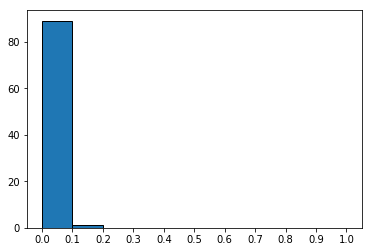

In [41]:
# neighbors = 10
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

## Intercluster Similarity

In [42]:
def intercluster_dist():
    indices = range(num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(wv_matrix[[x[1] for x in cluster_list[i]]], axis=0)
                cluster_centroid_j = np.average(wv_matrix[[x[1] for x in cluster_list[j]]], axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

In [43]:
intercluster_distances, values = intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 1.647962849797084
